In [1]:
import gym

In [2]:
# to install gym_act:
# git clone https://github.com/PhilippeW83440/CS234_Project.git
# cd gym-act
# pip install -e .
import gym_act

# source code is in https://github.com/PhilippeW83440/CS234_Project/blob/master/gym-act/gym_act/envs/act_env.py
# or if you did: git clone https://github.com/PhilippeW83440/CS234_Project.git
# in CS234_Project/gym-act/gym_act/envs/act_env.py
env = gym.make("Act-v0")

[2019-03-10 15:44:14,447] Making new env: Act-v0


SEED 6887498492990337069


In [3]:
action = 0
obs, reward, done, info = env.step(action)
print("reward {}".format(reward))
img = env.render()

reward 0


In [4]:
import matplotlib.pyplot as plt
import cv2

def show_img(img):
    plt.imshow(img)
    plt.show()
    
def  resize_images(images, f=3):
    big_images = []
    for img in images:
        big_images.append(cv2.resize(img, None, fx=f, fy=f))
    return big_images

plt.rcParams["figure.figsize"]=10,10

In [5]:
import numpy as np

max_episodes = 15
max_steps = 120

# METRICS
metric_success = 0 # EFFICIENCY
metric_steps_to_goal = [] # SAFETY
metric_hardbrake = [] # COMFORT
metric_cumulated_reward = []

for episode in range(max_episodes):
    print("====> Start episode {}".format(episode))
    env.reset()
    cumulated_reward = 0
    images = []
    
    hardbrake = 0    
    for n in range(max_steps):
        action = 0
        #action = np.random.randint(low=-2,high=3) 
        if action <= -2:
            hardbrake += 1
        state, reward, done, info = env.step(action)
        env.penalty(state)
        cumulated_reward += reward
        print("Step {}: action={} reward={} done={}".format(n, action, reward, done)) # PHW DEBUG
        img = env.render()
        images.append(img)
        if done is True:
            if info == "success":
                metric_success += 1
                metric_steps_to_goal.append(n)
                metric_hardbrake.append(hardbrake)
                metric_cumulated_reward.append(cumulated_reward)
            print("End of episode {} with cumulated_reward {}".format(episode, cumulated_reward))
            break

print("METRICS: REWARD AvgCumulatedReward = {}".format(np.mean(metric_cumulated_reward)))
print("METRICS: SAFETY %collisions = {}, COMFORT MeanHardBrake = {}, EFFICIENCY MeanStepsToGoal = {}".format(1-metric_success/max_episodes, np.mean(metric_hardbrake), np.mean(metric_steps_to_goal)))

====> Start episode 0
PENALTY smallest_TTC inf smallest_TTC penalty 0.0
Step 0: action=0 reward=0 done=False
PENALTY smallest_TTC inf smallest_TTC penalty 0.0
Step 1: action=0 reward=0 done=False
PENALTY smallest_TTC inf smallest_TTC penalty 0.0
Step 2: action=0 reward=0 done=False
PENALTY smallest_TTC inf smallest_TTC penalty 0.0
Step 3: action=0 reward=0 done=False
PENALTY smallest_TTC inf smallest_TTC penalty 0.0
Step 4: action=0 reward=0 done=False
PENALTY smallest_TTC inf smallest_TTC penalty 0.0
Step 5: action=0 reward=0 done=False
PENALTY smallest_TTC inf smallest_TTC penalty 0.0
Step 6: action=0 reward=0 done=False
PENALTY smallest_TTC inf smallest_TTC penalty 0.0
Step 7: action=0 reward=0 done=False
PENALTY smallest_TTC inf smallest_TTC penalty 0.0
Step 8: action=0 reward=0 done=False
PENALTY smallest_TTC inf smallest_TTC penalty 0.0
Step 9: action=0 reward=0 done=False
PENALTY smallest_TTC inf smallest_TTC penalty 0.0
Step 10: action=0 reward=0 done=False
PENALTY smallest_TTC

PENALTY smallest_TTC 4.067681690592595 smallest_TTC penalty 5.932318309407405
Step 10: action=0 reward=-69.32318309407405 done=False
PENALTY smallest_TTC 3.8420095244079207 smallest_TTC penalty 6.157990475592079
Step 11: action=0 reward=-71.5799047559208 done=False
PENALTY smallest_TTC 3.6193525989104196 smallest_TTC penalty 6.380647401089581
Step 12: action=0 reward=-73.80647401089581 done=False
PENALTY smallest_TTC 3.3994735466361754 smallest_TTC penalty 6.600526453363825
Step 13: action=0 reward=-76.00526453363825 done=False
PENALTY smallest_TTC 3.1821918475037507 smallest_TTC penalty 6.81780815249625
Step 14: action=0 reward=-78.1780815249625 done=False
PENALTY smallest_TTC 2.967370605744518 smallest_TTC penalty 7.032629394255482
Step 15: action=0 reward=-80.32629394255481 done=False
PENALTY smallest_TTC 2.7549077171280647 smallest_TTC penalty 7.245092282871935
Step 16: action=0 reward=-82.45092282871936 done=False
PENALTY smallest_TTC 2.5447299279971354 smallest_TTC penalty 7.4552

In [6]:
print(metric_hardbrake)
print(metric_success)
print(metric_steps_to_goal)
print(max_episodes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10
[49, 49, 49, 49, 49, 49, 49, 49, 49, 49]
15


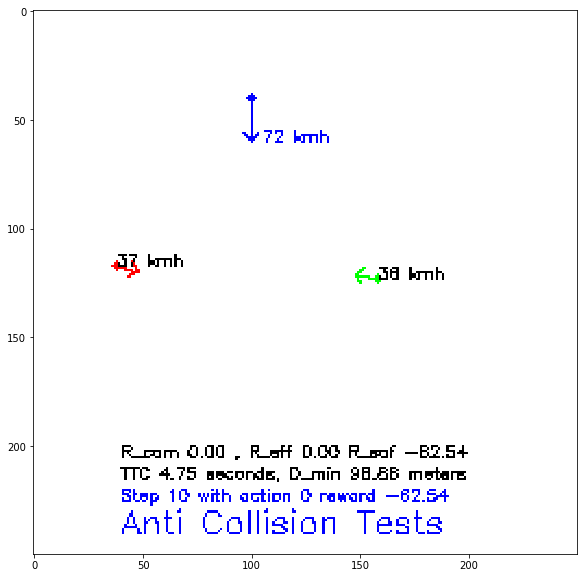

In [7]:
show_img(images[9])

# Visualization

In [ ]:
import imageio
from IPython.core.display import HTML

In [ ]:
imageio.mimsave('img/visu.gif', images, duration=0.2)
HTML("""<img src="img/visu.gif"/>""")

In [ ]:
big_images = resize_images(images, f=2)
imageio.mimsave('img/visu2.gif', big_images, duration=0.2)
HTML("""<img src="img/visu2.gif"/>""")